# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [5]:
df.shape

(2000, 2)

In [6]:
df = df.dropna()

In [7]:
df.shape

(1965, 2)

(0.0, 1500.0)

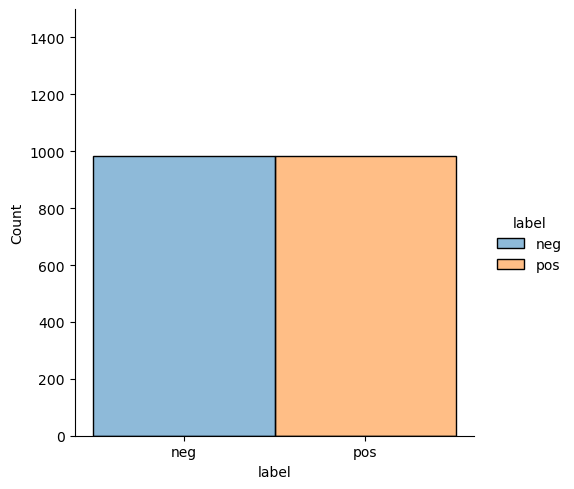

In [8]:
sns.displot(df,x='label',hue='label')
plt.ylim(0,1500)

In [9]:
df['label'].value_counts()

label
neg    983
pos    982
Name: count, dtype: int64

In [10]:
df[~df['review'].str.isspace()]

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [11]:
df = df[~df['review'].str.isspace()]

In [12]:
df.shape

(1938, 2)

In [13]:
# model Training

In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [15]:
X = df['review']

In [16]:
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [18]:
X_validiation_test, X_holdout_test, y_validiation_test, y_holdout_test = train_test_split(X_test, y_test, test_size=0.50, random_state=101)

In [19]:
cv = CountVectorizer(stop_words='english')

In [20]:
X_train_cv = cv.fit_transform(X_train)

In [21]:
X_validiation_cv = cv.transform(X_validiation_test)

In [22]:
mNB = MultinomialNB()

In [23]:
mNB.fit(X_train_cv,y_train)

MultinomialNB()

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
y_pred_mnb = mNB.predict(X_validiation_cv)

In [26]:
accuracy_score(y_validiation_test,y_pred_mnb)

0.7938144329896907

In [27]:
tasks = [('tfidf',TfidfVectorizer()),('svc',SVC())]

In [28]:
pipe = Pipeline(tasks)

In [29]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [30]:
y_validiation_pipe = pipe.predict(X_validiation_test)

In [31]:
accuracy_score(y_validiation_test,y_validiation_pipe)

0.845360824742268

In [32]:
print(classification_report(y_validiation_test,y_validiation_pipe))

              precision    recall  f1-score   support

         neg       0.84      0.86      0.85        98
         pos       0.85      0.83      0.84        96

    accuracy                           0.85       194
   macro avg       0.85      0.85      0.85       194
weighted avg       0.85      0.85      0.85       194



In [33]:
# Final Model Evalvation on Holdout test on pipe with TFIDF and SVC

In [34]:
y_final_pred = pipe.predict(X_holdout_test)

In [35]:
accuracy_score(y_holdout_test,y_final_pred)

0.8092783505154639

In [36]:
print(classification_report(y_holdout_test,y_final_pred))

              precision    recall  f1-score   support

         neg       0.77      0.85      0.81        93
         pos       0.85      0.77      0.81       101

    accuracy                           0.81       194
   macro avg       0.81      0.81      0.81       194
weighted avg       0.81      0.81      0.81       194



In [38]:
confusion_matrix(y_holdout_test,y_final_pred)

array([[79, 14],
       [23, 78]], dtype=int64)

In [39]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [47]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [49]:
y_pred = pipe.predict(X_test)

In [50]:
confusion_matrix(y_test,y_pred)

array([[246,  49],
       [ 51, 236]], dtype=int64)

In [51]:
accuracy_score(y_test,y_pred)

0.8281786941580757

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         neg       0.83      0.83      0.83       295
         pos       0.83      0.82      0.83       287

    accuracy                           0.83       582
   macro avg       0.83      0.83      0.83       582
weighted avg       0.83      0.83      0.83       582

